# 데이터에서 인사이트 발견하기

## 탐색적 데이터 분석의 과정

* 데이터의 출처, 주제, 크기, 구성요소 살펴보기
* 피처의 속성탐색, 피처 간의 상관관계 탐색
* 탐색한 데이터의 시각화

## 멕시코풍 프랜차이즈 chipotle의 주문 데이터 분석하기

* 가장 인기있는 메뉴는 무엇일까?
* 가장 많이 판매된 메뉴 Top10은 무엇일까?
* 메뉴별 판매량은 얼마나 될까?
* 메뉴별 가격대는 얼마일까?

### 탐색: 데이터의 기초정보 살펴보기

In [2]:
import pandas as pd

file_path='./data/chipotle.tsv'
chipo=pd.read_csv(file_path,sep='\t')

print(chipo.shape)
print("-----------------------------")
print(chipo.info())

(4622, 5)
-----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


In [3]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [5]:
print(chipo.columns)
print(chipo.index)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')
RangeIndex(start=0, stop=4622, step=1)


In [8]:
chipo['order_id']=chipo['order_id'].astype(str)
print(chipo.describe())

          quantity
count  4622.000000
mean      1.075725
std       0.410186
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max      15.000000


In [10]:
print(len(chipo['order_id'].unique())) # order_id의 개수 출력
print(len(chipo['item_name'].unique()))  # item_name의 개수 출력

1834
50


### 인사이트의 발견: 탐색과 시각화하기

In [13]:
# 가장 많이 주문한 아이템 Top10 출력하기
item_count=chipo['item_name'].value_counts()[:10]
for idx, (val, cnt) in enumerate(item_count.iteritems(),1):
    print("Top", idx, ":", val, cnt)

Top 1 : Chicken Bowl 726
Top 2 : Chicken Burrito 553
Top 3 : Chips and Guacamole 479
Top 4 : Steak Burrito 368
Top 5 : Canned Soft Drink 301
Top 6 : Chips 211
Top 7 : Steak Bowl 211
Top 8 : Bottled Water 162
Top 9 : Chicken Soft Tacos 115
Top 10 : Chicken Salad Bowl 110


In [14]:
# 아이템별 주문 개수 출력
order_count=chipo.groupby('item_name')['order_id'].count()
order_count[:10]

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

In [15]:
# 아이템별 주문 총량 출력
item_quantity=chipo.groupby('item_name')['quantity'].sum()
item_quantity[:10]

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

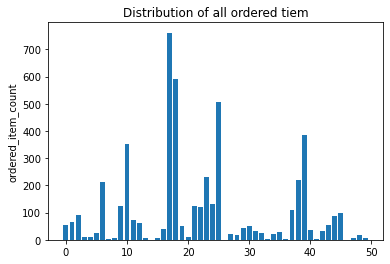

In [18]:
# 시각화로 분석결과 살펴보기
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

item_name_list=item_quantity.index.tolist()
x_pos=np.arange(len(item_name_list))
order_cnt=item_quantity.values.tolist()

plt.bar(x_pos,order_cnt,align='center')
plt.ylabel('ordered_item_count')
plt.title('Distribution of all ordered tiem')

plt.show()

### 데이터 전처리: 전처리 함수 사용하기

In [19]:
print(chipo.info())
print('-------------')
chipo['item_price'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   object
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(1), object(4)
memory usage: 180.7+ KB
None
-------------


0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object

In [20]:
# column 단위 데이터에 apply() 함수로 전처리하기
chipo['item_price']=chipo['item_price'].apply(lambda x: float(x[1:]))
chipo.describe()

,quantity,item_price
count,4622.000000,4622.000000
mean,1.075725,7.464336
std,0.410186,4.245557
min,1.000000,1.090000
25%,1.000000,3.390000
50%,1.000000,8.750000
75%,1.000000,9.250000
max,15.000000,44.250000


* apply() : 시리즈 단위의 연산을 처리하는 기능을 수행하여 sum(), mean()과 같이 연산이 정의된 함수를 파라미터로 받는다. 

### 탐색적 분석: 스무고개로 개념적 탐색 분석하기

In [21]:
# 주문당 평균 계산 금액 출력
chipo.groupby('order_id')['item_price'].sum().mean()

18.811428571428568

In [23]:
# 한 주문에 10달러 이상 지불한 주문번호(id) 출력
chipo_orderid_group=chipo.groupby('order_id').sum()
results=chipo_orderid_group[chipo_orderid_group.item_price >= 10]
print(results[:10])
print(results.index.values)

          quantity  item_price
order_id                      
1                4       11.56
10               2       13.20
100              2       10.08
1000             2       20.50
1001             2       10.08
1002             2       10.68
1003             2       13.00
1004             2       21.96
1005             3       12.15
1006             8       71.40
['1' '10' '100' ... '997' '998' '999']


In [25]:
# 각 아이템의 가격 구하기
chipo_one_item=chipo[chipo.quantity == 1]
price_per_item=chipo_one_item.groupby('item_name').min()
price_per_item.sort_values(by="item_price", ascending=False)[:10]

,order_id,quantity,choice_description,item_price
item_name,,,,
Steak Salad Bowl,1032,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,1283,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,1035,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39
Carnitas Soft Tacos,1011,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99
Carnitas Crispy Tacos,1774,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.99
Steak Soft Tacos,1054,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99
Carnitas Bowl,1007,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...",8.99
Barbacoa Soft Tacos,1103,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99


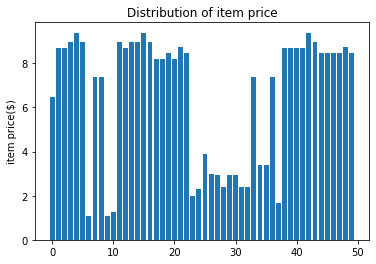

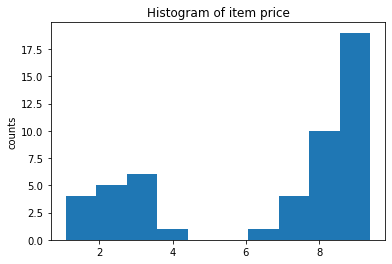

In [27]:
# 아이템 가격 분포 그래프 출력
item_name_lits=price_per_item.index.tolist()
x_pos=np.arange(len(item_name_list))
item_price=price_per_item['item_price'].tolist()

plt.bar(x_pos, item_price, align='center')
plt.ylabel('item price($)')
plt.title('Distribution of item price')
plt.show()

plt.hist(item_price)
plt.ylabel('counts')
plt.title('Histogram of item price')
plt.show()

In [28]:
# 가장 비싼 주문에서 아이템이 총 몇 개 팔렸는지 구하기
chipo.groupby('order_id').sum().sort_values(by='item_price', ascending=False)[:5]

,quantity,item_price
order_id,,
926,23,205.25
1443,35,160.74
1483,14,139.00
691,11,118.25
1786,20,114.30


In [29]:
# Veggie Salad Bowl이 몇 번 주문되었는지 계산
chipo_salad=chipo[chipo['item_name']=="Veggie Salad Bowl"]

# 한 주문 내에서 중복 집계된 item_name을 제거
chipo_salad=chipo_salad.drop_duplicates(['item_name','order_id'])

print(len(chipo_salad))
chipo_salad.head(5)

18


,order_id,quantity,item_name,choice_description,item_price
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
295,128,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",11.25
455,195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
496,207,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...",11.25
960,394,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [31]:
# Chicken Bowl을 2개 이상 주문한 주문 횟수 구하기
chipo_chicken=chipo[chipo['item_name']=="Chicken Bowl"]
chipo_chicken_ordersum=chipo_chicken.groupby('order_id').sum()['quantity']
chipo_chicken_result=chipo_chicken_ordersum[chipo_chicken_ordersum >= 2]

print(len(chipo_chicken_result))
chipo_chicken_result.head(5)

114


order_id
1004    2
1023    2
1072    2
1078    2
1091    2
Name: quantity, dtype: int64

## 국가별 음주 데이터 분석하기
* 국가별 음주 데이터를 활용하여 탐색적 데이터 분석을 진행한다.
* 데이터 분석 라이브러리의 사용법과 탐색적 데이터 분석의 과정에 익숙해지는 것을 목표로 한다.
* 탐색 주제: 대한민국은 술을 얼마나 독하게 마시는 나라일까? (전체 200여 개 국가 중 13위)

### 탐색: 데이터의 기초 정보 살펴보기

In [3]:
# drinks 데이터셋의 기초 정보 출력하기

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path='./data/drinks.csv'
drinks=pd.read_csv(file_path)
print(drinks.info())
drinks.head(10)
# spirit= An alcoholic beverage, especially distilled liquor(증류주)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB
None


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [4]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


### 인사이트의 발견: 탐색과 시각화하기

* 상관관계 분석방법: 단순상관분석(피처가 2개), 다중상관분석(피처가 여러개)
* 상관분석: 두 변수 간의 선형적인 관계를 상관계수로 표현하는 것
* 상관계수: 공분산은 척도가변이기 때문에 이를 보완하고자 정규화를 시킨 것이 상관계수, -1에서 1사이 값
* (단, 상관계수가 0이라고해서 상관관계가 없는 것이 아니라 직선의 상관관계가 아닌 것임)
* 공분산: 분산이 평균으로부터 어느정도 떨어져있는지를 나타내는 척도라면 공분산은 두 확률변수의 상관정도

In [7]:
# 두 피처 간의 상관계수 구하기(Pearson 상관계수)
corr=drinks[['beer_servings', 'wine_servings']].corr(method='pearson') #그래프 출력을 위한 cols name
print(corr)

               beer_servings  wine_servings
beer_servings       1.000000       0.527172
wine_servings       0.527172       1.000000


In [8]:
# 여러 피처의 상관관계 분석하기(Matrix)

cols=['beer_servings', 'spirit_servings','wine_servings','total_litres_of_pure_alcohol']
corr=drinks[cols].corr(method='pearson')
print(corr)

                              beer_servings  spirit_servings  wine_servings  \
beer_servings                      1.000000         0.458819       0.527172   
spirit_servings                    0.458819         1.000000       0.194797   
wine_servings                      0.527172         0.194797       1.000000   
total_litres_of_pure_alcohol       0.835839         0.654968       0.667598   

                              total_litres_of_pure_alcohol  
beer_servings                                     0.835839  
spirit_servings                                   0.654968  
wine_servings                                     0.667598  
total_litres_of_pure_alcohol                      1.000000  


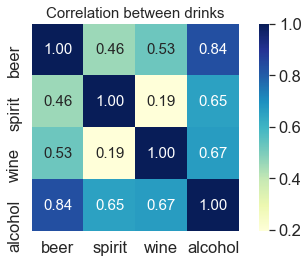

In [22]:
# 여러 피처의 상관관계 분석하기(히트맵)-> seaborn 라이브러리 설치
import seaborn as sns
import matplotlib.pyplot as plt

cols_view=['beer','spirit','wine','alcohol']
sns.set(font_scale=1.5)
hm=sns.heatmap(corr.values, 
              cbar=True, # color 바의 유무
              annot=True, # 각 셀에 숫자입력
              square=True,# 셀을 정사각형으로 출력
              fmt='.2f', # 실수형 타입
              annot_kws={'size':15},
              cmap='YlGnBu', # 히트맵 색상
              yticklabels=cols_view, # y축 라벨
              xticklabels=cols_view) # y축 라벨

plt.title('Correlation between drinks', fontsize=15) # 히트맵 타이틀
plt.tight_layout()
plt.show()

# seaborn 외에도 pandas, matplotlib로 히트맵을 그릴 수 있다. (참고: https://rfriend.tistory.com/419)
# heatmap parameters 참고: https://hong-yp-ml-records.tistory.com/33

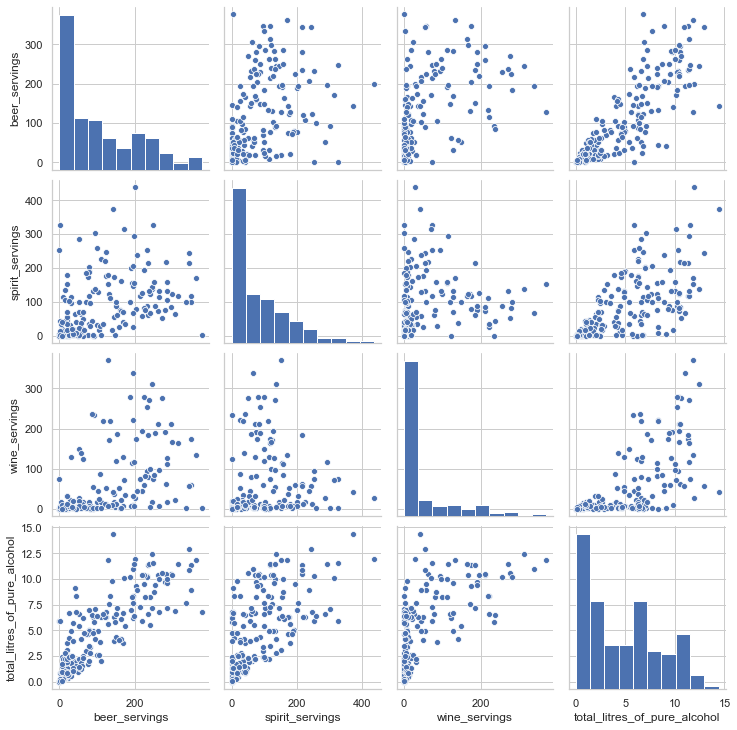

In [12]:
# 여러 피처의 상관관계 분석하기(산점도 그래프)-> seaborn 라이브러리 설치

sns.set(style='whitegrid',context='notebook')
sns.pairplot(drinks[['beer_servings', 'spirit_servings','wine_servings','total_litres_of_pure_alcohol']], height=2.5)
plt.show()

### 탐색적 분석: 스무고개로 개념적 탐색 분석하기

In [24]:
# 결측(NA)데이터 확인하기

drinks.isnull().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

In [28]:
# 결측 데이터 전처리하기(data cleansing)-> 기타 대륙으로 통합 'OT'
drinks['continent']=drinks['continent'].fillna('OT')

#drinks.head(10)
drinks.isnull().sum()

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

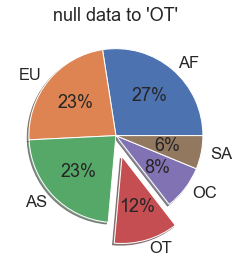

In [29]:
# 파이차트로 시각화하기

labels=drinks['continent'].value_counts().index.tolist() # 파이차트 라벨
fracs1=drinks['continent'].value_counts().values.tolist() # ratio(비율)
explode=(0,0,0,0.25,0,0)

plt.pie(fracs1, explode=explode, labels=labels, autopct='%.0f%%',shadow=True)
# ratio
# explode: 부채꼴이 중심에서 벗어나는 정도
#label
# autopct: 숫자형식(정수형)
# startangle:시작각도(0 디폴트)
# counterclock:반시계방향(False 디폴트)
# shadedow: 그림자

plt.title('null data to \'OT\'')
plt.show()

# 파이차트 파리미터 참고: https://wikidocs.net/92114

### * 미니퀴즈 1-2

In [32]:
# Question 1
print(drinks['continent'].value_counts().index.tolist())
print(drinks['continent'].value_counts().values.tolist())

['AF', 'EU', 'AS', 'OT', 'OC', 'SA']
[53, 45, 44, 23, 16, 12]


In [34]:
# Question 2

print(fracs1)
print(labels)

[53, 45, 44, 23, 16, 12]
['AF', 'EU', 'AS', 'OT', 'OC', 'SA']


In [35]:
# agg() 함수를 이용해 대룍별로 분석하기
# 대륙별 spirit_servings의 평균, 최소, 최대, 합계를 계산한다.
# agg(): apply()함수와 거의 동일한 기능을 하지만, 그룹별 연산이 가능하다.
# 참고: https://steadiness-193.tistory.com/43

result=drinks.groupby('continent').spirit_servings.agg(['mean','min','max','sum'])
result.head()

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812


In [39]:
# 전체 평균보다 많은 알코올을 섭취하는 대륙을 구한다.

total_mean=drinks.total_litres_of_pure_alcohol.mean()  # total_litres_of_pure_alcohol 평균
continent_mean=drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean() # 대륙별 평균
continent_over_mean=continent_mean[continent_mean >= total_mean] # 전체 평균보다 높은 대륙별 평균

print(total_mean)
print(continent_mean)
print(continent_over_mean)

4.717098445595855
continent
AF    3.007547
AS    2.170455
EU    8.617778
OC    3.381250
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64
continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64


In [41]:
# 평균 beer_servings가 가장 높은 대륙을 구한다.

beer_continent=drinks.groupby('continent').beer_servings.mean().idxmax()
print(beer_continent)

EU


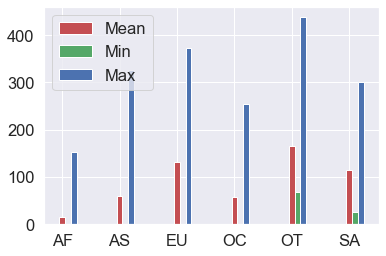

In [45]:
# 분석결과를 시각화하기
# 대륙별 spirit_servings의 평균,최소,최대,합계를 시각화(막대그래프)

n_groups=len(result.index)
means=result['mean'].tolist()
mins=result['min'].tolist()
maxs=result['max'].tolist()
sums=result['sum'].tolist()

index=np.arange(n_groups)
bar_width=0.1

rects1=plt.bar(index, means, bar_width, color='r', label='Mean')
rects2=plt.bar(index + bar_width, mins, bar_width, color='g', label='Min')
rects3=plt.bar(index + bar_width * 2, maxs, bar_width, color='b', label='Max')

plt.xticks(index, result.index.tolist())
plt.legend()
plt.show()

In [46]:
print(n_groups)
print(means)
print(mins)
print(maxs)
print(sums)
print(index)

6
[16.339622641509433, 60.84090909090909, 132.55555555555554, 58.4375, 165.7391304347826, 114.75]
[0, 0, 0, 0, 68, 25]
[152, 326, 373, 254, 438, 302]
[866, 2677, 5965, 935, 3812, 1377]
[0 1 2 3 4 5]


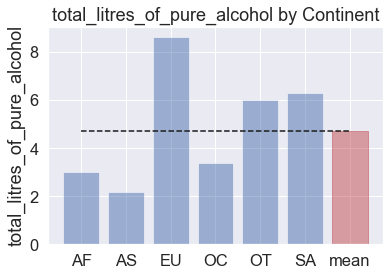

In [51]:
# 대륙별 total_litres_of_pure_alcohol 시각화

continents=continent_mean.index.tolist()
continents.append('mean')
x_pos=np.arange(len(continents))
alcohol=continent_mean.tolist()
alcohol.append(total_mean)

bar_list=plt.bar(x_pos, alcohol, align='center', alpha=0.5)
bar_list[len(continents)-1].set_color('r')
plt.plot([0.,6], [total_mean, total_mean],"k--")
plt.xticks(x_pos, continents)

plt.ylabel('total_litres_of_pure_alcohol')
plt.title('total_litres_of_pure_alcohol by Continent')

plt.show()

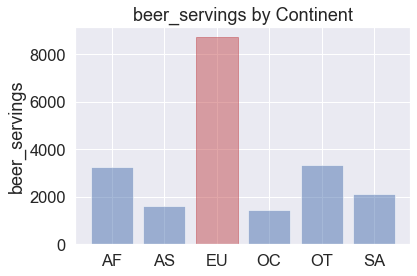

In [53]:
# 대륙별 beer_servings 시각화

beer_group=drinks.groupby('continent')['beer_servings'].sum() # 대륙별  beer_servings 합계
continents=beer_group.index.tolist() # 대륙별 index
y_pos=np.arange(len(continents))
alcohol=beer_group.tolist() # 대륙별  beer_servings 합계 리스트

bar_list=plt.bar(y_pos, alcohol, align='center', alpha=0.5)
bar_list[continents.index("EU")].set_color('r')
plt.xticks(y_pos, continents)
plt.ylabel('beer_servings')
plt.title('beer_servings by Continent')

plt.show()



In [54]:
print(beer_group)
print(continents)
print(y_pos)
print(alcohol)
print(bar_list)

continent
AF    3258
AS    1630
EU    8720
OC    1435
OT    3345
SA    2101
Name: beer_servings, dtype: int64
['AF', 'AS', 'EU', 'OC', 'OT', 'SA']
[0 1 2 3 4 5]
[3258, 1630, 8720, 1435, 3345, 2101]
<BarContainer object of 6 artists>


### * 미니퀴즈 1-3

In [55]:
# Question 1

#result=drinks.groupby('continent').spirit_servings.agg(['mean','min','max','sum'])

means=result['mean'].tolist() # 대륙별 spirit_servings mean
mins=result['min'].tolist()
maxs=result['max'].tolist()
sums=result['sum'].tolist()

print(means)
print(mins)
print(maxs)
print(sums)

[16.339622641509433, 60.84090909090909, 132.55555555555554, 58.4375, 165.7391304347826, 114.75]
[0, 0, 0, 0, 68, 25]
[152, 326, 373, 254, 438, 302]
[866, 2677, 5965, 935, 3812, 1377]


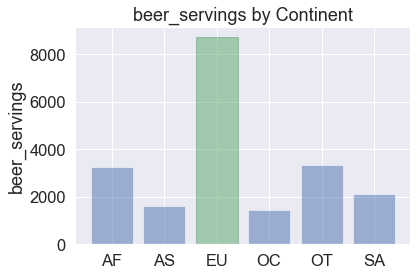

In [56]:
# Question 2

beer_group=drinks.groupby('continent')['beer_servings'].sum() # 대륙별  beer_servings 합계
continents=beer_group.index.tolist() # 대륙별 index
y_pos=np.arange(len(continents))
alcohol=beer_group.tolist() # 대륙별  beer_servings 합계 리스트

bar_list=plt.bar(y_pos, alcohol, align='center', alpha=0.5)
bar_list[continents.index("EU")].set_color('g')
plt.xticks(y_pos, continents)
plt.ylabel('beer_servings')
plt.title('beer_servings by Continent')

plt.show()

### 통계적 분석: 분석 대상 간의 통계적 차이 검정하기
* 분석결과에 타당성을 부여하기 위해 통계적으로 차이를 검정하는 과정 필요
* t-test 분석: 두 집단간의 평균의 차이에 대한 검정방법, 실제 모집단의 정보를 모를때(샘플의 정보만 있을 때) 두 집단의 차이에 대한 검정
* 두 집단의 데이터 개수가 비슷하면서 두 데이터가 모두 정규부포를 가진 경우 신뢰도가 높다. 
* 두 집단의 분산이 같은 경우(등분산)와 다른 경우(이분산)로 나누어 분석한다.

In [61]:
# 아프리카와 유럽 간의 맥주 소비량 차이 검정하기

africa=drinks.loc[drinks['continent']=='AF']
europe=drinks.loc[drinks['continent']=="EU"]

from scipy import stats
tTestResult=stats.ttest_ind(africa['beer_servings'], europe['beer_servings'])  # 등분산
tTestResulttDiffVar=stats.ttest_ind(africa['beer_servings'], europe['beer_servings'], equal_var=False) # 이분산

print("The t-statistic and p-value assuming equal variances is %.3f and %.3f." %tTestResult) # 검정통계량, p값
print("The t-statistic and p-value not assuming equal variances is %.3f and %.3f." %tTestResulttDiffVar)

The t-statistic and p-value assuming equal variances is -7.268 and 0.000.
The t-statistic and p-value not assuming equal variances is -7.144 and 0.000.


* 통계적 가설검정

* 귀무가설(H_0): 일반적으로 널리 알려진 사실, 대립가설(H_1): 실험자가 새로 주장하고하는 바
* 귀무가설을 기각할만한 충분한 근거가 발견되지않으면 귀무가설을 기각할 수 없다. (즉, 대립가설을 채택할 수 없다.)
* 이 때 충분한 근거가 되는 통계량을 '검정통계량'이라고 하며 위에서 구한 t값이 통계량이 된다.
* 통계적 계산을 통해 통계량이 유의한 증거인지를 보일 수 있지만 일반적으로 컴퓨터에서는 p-value 값을 제공하여 비교를 쉽게한다.
* p-value란 귀무가설이 맞다는 전제하에서 귀무가설에 반증이되는 관측값을 얻을 확률이다.(귀무가설 참일 때 귀무가설 기각확률)
* 검정통계랑과 p-value의 차이: 검정통계량은 단순히 귀무가설을 기각할 것인지 채택할 것인지 이분법적인 결과만을 제공한다면, p-value는 주어진 자료가 귀무가설에 어느정도의 반증이되는지를 수치적으로 제공한다.
* 따라서 p-value가 주어진 유의수준보다 작을 때 대립가설에 대한 충분한 증거가 된다고 판단하여 귀무가설을 기각한다.
* 유의수준: 통계적 가설검정에서는 표본의 정보에 의존하기때문에 오류를 범할 수 있다. 이 때 발생하는 오류는 1종오류, 2종오류가 있는데 두 가지의 오류를 동시에 작게 할 수 없으므로 더 위험한 오류인 1종오류를 일정한 값으로 고정하고 2종오류를 최소화한다. 1종오류로는 0.05, 0.01 등이 자주 사용된다.


In [63]:
# 귀무가설(H_0): 두 집단의 평균은 같다.
# 등분산인 경우: p-value=0.000 < 0.05이므로 주어진 귀무가설 기각. 즉, 두 집단의 평균은 같지 않다.
# 이분산인 경우: p-value=0.000 < 0.05이므로 주어진 귀무가설 기각. 즉, 두 집단의 평균은 같지 않다.

# 따라서, 아프리카와 유럽의 두 나라 간의 맥주 소비량은 차이가 있다라고 할 수 있는 통계적 근거가 없다.
# 그러나, 주어진 두 집단의 데이터 크기가 다르고 표본의 크기가 작기 때문에 통계적으로 유의미하다고 말하기 어렵다.

In [95]:
# 대한민국은 얼마나 술을 독하게 마시는 나라일까?에 대한 탐색코드

# total_servings 피처 생성
drinks['total_servings']=drinks['beer_servings']+drinks['wine_servings']+drinks['spirit_servings']

# 술 소비량 대비 알코올 비율 피처 생성(대륙별 소비량/전체 소비량)
drinks['alcohol_rate']=drinks['total_litres_of_pure_alcohol']/drinks['total_servings']
drinks['alcohol_rate']=drinks['alcohol_rate'].fillna(0)  # 결측치는 0으로 대체

# 순위정보 생성
country_with_rank=drinks[['country','alcohol_rate']]
country_with_rank=country_with_rank.sort_values(by=['alcohol_rate'], ascending=0) # 내림차순 정렬
country_with_rank.head(20)
                                                                     
                                                                

,country,alcohol_rate
63,Gambia,0.266667
153,Sierra Leone,0.223333
124,Nigeria,0.185714
179,Uganda,0.153704
142,Rwanda,0.151111
183,Tanzania,0.132558
26,Burkina Faso,0.110256
33,Central African Republic,0.090000
28,Cote d'Ivoire,0.088889
104,Mali,0.085714


In [94]:
#print(drinks['total_servings'])
print(drinks.head(5))
#print(country_with_rank)

              country  beer_servings  spirit_servings  wine_servings  \
0         Afghanistan              0                0              0   
1             Albania             89              132             54   
2             Algeria             25                0             14   
3             Andorra            245              138            312   
4              Angola            217               57             45   
5   Antigua & Barbuda            102              128             45   
6           Argentina            193               25            221   
7             Armenia             21              179             11   
8           Australia            261               72            212   
9             Austria            279               75            191   
10         Azerbaijan             21               46              5   
11            Bahamas            122              176             51   
12            Bahrain             42               63           

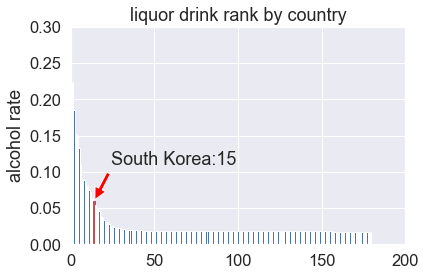

In [101]:
# 국가별 순위정보 시각화

country_list=country_with_rank.country.tolist() # 대륙별 순위에서 대륙 이름 리스트로 불러오기
x_pos=np.arange(len(country_list)) # 대륙별 이름 개수만큼 리스트 생성
rank=country_with_rank.alcohol_rate.tolist() # 대륙별 순위에서 랭크순위 리스트로 불러오기

bar_list=plt.bar(x_pos, rank) # x_pos와 rank로 막대그래프 생성
bar_list[country_list.index("South Korea")].set_color('r') # South Korea는 빨간색으로 표시
plt.ylabel('alcohol rate') # y축 라벨
plt.title('liquor drink rank by country') # 그래프 제목
plt.axis([0,200,0,0.3]) # x축, y축 범위설정

korea_rank=country_list.index("South Korea") # South Korea의 랭크=14
korea_alc_rate=country_with_rank[country_with_rank['country']=='South Korea']['alcohol_rate'].values[0] # South Korea의 rate
plt.annotate('South Korea:'+ str(korea_rank+1),  # 주석달기(리스트가 0부터 시작하므로 rank+1)
             xy=(korea_rank, korea_alc_rate), # xy 좌표설정
              xytext=(korea_rank +10, korea_alc_rate+0.05), # 주석위치설정
              arrowprops=dict(facecolor='red',shrink=0.05)) # 화살표 특성 설정
plt.show()

In [88]:
#print(country_list)
print(x_pos)
#print(rank)
#print(bar_list)
#print(korea_rank)
print(korea_alc_rate)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192]
0.0593939393939394


## 연습문제

In [105]:
# Question 1: 대륙별 평균 wine_servings 탐색

result2=drinks.groupby('continent').wine_servings.agg(['mean'])
result2.head()

,mean
continent,
AF,16.264151
AS,9.068182
EU,142.222222
OC,35.625000
OT,24.521739


In [127]:
# A

drinks['wine_servings_cont_avg']=drinks.groupby('continent')['wine_servings'].transform(np.mean)
drinks[['continent','wine_servings_cont_avg']].sample(5).head()

,continent,wine_servings_cont_avg
85,EU,142.222222
136,AF,16.264151
137,AF,16.264151
149,OT,24.521739
57,EU,142.222222


In [122]:
#  Question 2: 국가별 모든 servings의 합을 계산한 total_servings라는 피처 생성하기

drinks['total_servings']=drinks['beer_servings']+drinks['wine_servings']+drinks['spirit_servings']

drinks[['country','beer_servings','wine_servings','spirit_servings','total_servings']].sample(5).head()

,country,beer_servings,wine_servings,spirit_servings,total_servings
151,Serbia,283,127,131,541
69,Guatemala,53,2,69,124
114,Morocco,12,10,6,28
19,Bhutan,23,0,0,23
68,Grenada,199,28,438,665


In [123]:
# Question 3: 전체 평균보다 적은 알코올을 마시는 대륙 중, spirit를 가장 많이 마시는 국가 찾기

total_mean=drinks.total_litres_of_pure_alcohol.mean() # 전체평균
continent_mean=drinks.groupby('continent').total_litres_of_pure_alcohol.mean() # 대륙별 평균
continent_under_mean=continent_mean[continent_mean <= total_mean].index.tolist()
df_continent_under_mean=drinks.loc[drinks.continent.isin(continent_under_mean)] # 전체 평균보다 적은 알코올을 섭취하는 대륙 필터링

most_spirit_under_mean=df_continent_under_mean.loc[df_continent_under_mean['spirit_servings'].idxmax()]

most_spirit_under_mean['country']

'Russian Federation'

In [126]:
print(continent_under_mean)

['AF', 'AS', 'OC']


In [108]:
# Question 4: 술 소비량 대비 알코올 비율

# 술 소비량 대비 알코올 비율 피처 생성(대륙별 소비량/전체 소비량)
drinks['alcohol_rate']=drinks['total_litres_of_pure_alcohol']/drinks['total_servings']
drinks['alcohol_rate']=drinks['alcohol_rate'].fillna(0)  # 결측치는 0으로 대체

In [125]:
# Quetstion 5: 대륙별로 술 소비량 대비 알코올 비율

continent_sum=drinks.groupby('continent').sum()  # 대륙별 합
continent_sum['alcohol_rate_continent']=continent_sum['total_litres_of_pure_alcohol']/continent_sum['total_servings']

continent_sum=continent_sum.reset_index()
continent_sum=continent_sum[['continent','alcohol_rate_continent']]

drinks=pd.merge(drinks, continent_sum, on='continent', how='outer') # on: key 값, how: 겹치지않는 부분 nan처리

drinks[['country','continent','alcohol_rate_continent']].sample(5).head()

# merge 파라미터 참고: https://nittaku.tistory.com/121

,country,continent,alcohol_rate_continent
129,Senegal,AF,0.031970
5,Cambodia,AS,0.020293
152,Grenada,OT,0.017860
102,DR Congo,AF,0.031970
183,Nauru,OC,0.018401


In [128]:
print(continent_sum)

  continent  alcohol_rate_continent
0        AF                0.031970
1        AS                0.020293
2        EU                0.018392
3        OC                0.018401
4        OT                0.017860
5        SA                0.017909


# 텍스트 마이닝 첫걸음

* 비정형 데이터: 정해진 형태가 없고 연산이 불가능한 상태의 데이터(이미지, 음성, 텍스트 데이터)
* 텍스트 마이닝(Text Mining): 텍스트 데이터로부터 유의미한 정보를 추출하는 데이터 분석
* ex) SNS 데이터에 기반한 트럼프의 당선 예측, 검색 키워드 증가를 파악해 독감 유행을 예측한 구글

## 웹 크롤링으로 기초 데이터 수집하기

* 웹 크롤링/웹 스크래핑: 인터넷에 있는 웹 페이지를 방문해서 페이지의 자료를 자동으로 수집하는 작업

### 대상 페이지의 구조 살펴보기

### 웹 크롤링 라이브러리 사용하기

In [1]:
!pip install requests beautifulsoup4 lxml

In [1]:
# 페이지의 URL 정보 추출하기
import requests
from bs4 import BeautifulSoup
import re

# 크롤링할 사이트 주소 정의
source_url="https://namu.wiki/RecentChanges"

# 사이트의 HTML 구조에 기반하여 크롤링 수행

req=requests.get(source_url)
html=req.content
soup=BeautifulSoup(html,'lxml')
contents_table=soup.find(name="table")
table_body=contents_table.find(name="tbody")
table_rows=table_body.find_all(name="tr")

# a 태그의 href 속성을 리스트로 추출하여 크롤링할 페이지 리스트 생성
page_url_base="https://namu.wiki"
page_urls=[]
for index in range(0, len(table_rows)):
    first_td=table_rows[index].find_all('td')[0]
    td_url=first_td.find_all('a')
    if len(td_url) > 0:
        page_url=page_url_base + td_url[0].get('href')
        page_urls.append(page_url)
        
# 중복 url제거
page_urls=list(set(page_urls))
for page in page_urls[:5]:
    print(page)

https://namu.wiki/w/%ED%99%94%EC%84%B1%20IBK%EA%B8%B0%EC%97%85%EC%9D%80%ED%96%89%20%EC%95%8C%ED%86%A0%EC%8A%A4/2020-21%20%EC%8B%9C%EC%A6%8C
https://namu.wiki/w/%EB%B8%8C%EB%9D%BC%EC%A7%88%EB%A6%AC%EC%96%B8%20%EC%A3%BC%EC%A7%93%EC%88%98/%EA%B0%80%EB%93%9C
https://namu.wiki/w/%EA%B9%80%EA%B0%95%EC%82%B0(VOISPER)
https://namu.wiki/w/%EC%9A%B0%ED%95%9C%EA%B2%BD
https://namu.wiki/w/%ED%85%9C%ED%94%8C%EB%A6%BF:%EB%B2%94%EC%A3%84


### 텍스트 정보 수집하기

In [2]:
# URL 페이지 정보를 기반으로 크롤링하기
# 최근 변경된 문서 하나 크롤링

req = requests.get(page_urls[0])
html = req.content
soup = BeautifulSoup(html, 'lxml')
contents_table = soup.find(name="article")
title = contents_table.find_all('h1')[0]
category = contents_table.find_all('ul')[0]
content_paragraphs = contents_table.find_all(name="div", attrs={"class":"wiki-paragraph"})
content_corpus_list = []

for paragraphs in content_paragraphs:
    content_corpus_list.append(paragraphs.text)
content_corpus = "".join(content_corpus_list)

print(title.text)
print("\n")
print(category.text)
print("\n")
print(content_corpus)

화성 IBK기업은행 알토스/2020-21 시즌 


화성 IBK기업은행 알토스


   상위 문서: 화성 IBK기업은행 알토스/V-리그1. 오프시즌1.1. 선수 이동1.2. KOVO컵1.3. 신인드래프트2. 정규시즌2.1. 1라운드2.1.1. 10월 18일 vs 인삼공사 3:1 승2.1.2. 10월 25일 vs GS칼텍스 2:3 패2.1.3. 10월 30일 vs 현대건설 3:1 승2.1.4. 11월 7일 vs 흥국생명 0:3 패2.1.5. 11월 10일 vs 도로공사 3:1 승2.2. 2라운드2.2.1. 11월 13일 vs 인삼공사 3:2 승2.2.2. 11월 17일 vs 현대건설 3:1 승2.2.3. 11월 21일 vs GS칼텍스 0:3 패2.2.4. 11월 27일 vs 흥국생명 0:3 패2.2.5. 12월 1일 vs 도로공사 2:3 패2.3. 3라운드2.3.1. 12월 6일 vs 인삼공사 0:3 패2.3.2. 12월 11일 vs GS칼텍스 3:1 승2.3.3. 12월 18일 vs 흥국생명 0:3 패2.3.4. 12월 23일 vs 도로공사 3:2 승 2.3.5. 12월 26일 vs 현대건설 3:1 승 2.4. 4라운드2.4.1. 12월 30일 vs GS칼텍스 1:3 패2.4.2. 1월 9일 vs 인삼공사 0:3 패2.4.3. 1월 12일 vs 현대건설 3:2 승2.4.4. 1월 17일 vs 흥국생명 0:3 패2.4.5. 1월 23일 vs 도로공사 0:3 패2.4.6. 4라운드 총평2.5. 5라운드2.5.1. 1월 29일 vs GS칼텍스 3:2 승2.5.2. 2월 3일 vs 인삼공사 3:0 승2.5.3. 2월 7일 vs 도로공사 2:3 패2.5.4. 2월 13일 vs 현대건설2.5.5. 2월 16일 vs 흥국생명2.6. 6라운드2.6.1. 2월 20일 vs 현대건설2.6.2. 2월 24일 vs 흥국생명2.6.3. 2월 27일 vs 도로공사2.6.4. 3월 7일 vs 인삼공사 2.6.5. 3월 12일 vs GS칼텍스 3. 포스트시즌4. 상대 전적5. 시즌 총평F

## 나무위키 최근 변경 페이지 키워드 분석하기

### 크롤링: 웹 데이터 가져오기

In [3]:
# 나무위키의 최근 변경 데이터 크롤링하기
# 크롤링한 데이터를 데이터 프레임으로 만들기 위해 준비

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import re

columns = ['title', 'category', 'content_text']
df = pd.DataFrame(columns=columns)

# 각 페이지별 '제목', '카테고리', '본문' 정보를 데이터 프레임으로 만들기

for page_url in page_urls:

    # 사이트의 html 구조에 기반하여 크롤링을 수행
    
    req = requests.get(page_url)
    html = req.content
    soup = BeautifulSoup(html, 'lxml')
    contents_table = soup.find(name="article")
    title = contents_table.find_all('h1')[0]
    
    # 카테고리 정보가 없는 경우를 확인
    
    if len(contents_table.find_all('ul')) > 0:
        category = contents_table.find_all('ul')[0]
    else:
        category = None
        
    content_paragraphs = contents_table.find_all(name="div", attrs={"class":"wiki-paragraph"})
    content_corpus_list = []
    
    # 페이지 내 제목 정보에서 개행 문자를 제거한 뒤 추출. 만약 없는 경우, 빈 문자열로 대체
    
    if title is not None:
        row_title = title.text.replace("\n", " ")
    else:
        row_title = ""
    
    # 페이지 내 본문 정보에서 개행 문자를 제거한 뒤 추출. 만약 없는 경우, 빈 문자열로 대체
    
    if content_paragraphs is not None:
        for paragraphs in content_paragraphs:
            if paragraphs is not None:
                content_corpus_list.append(paragraphs.text.replace("\n", " "))
            else:
                content_corpus_list.append("")
    else:
        content_corpus_list.append("")
        
    # 페이지 내 카테고리정보에서 “분류”라는 단어와 개행 문자를 제거한 뒤 추출. 만약 없는 경우, 빈 문자열로 대체
    
    if category is not None:
        row_category = category.text.replace("\n", " ")
    else:
        row_category = ""
    
    # 모든 정보를 하나의 데이터 프레임에 저장
    
    row = [row_title, row_category, "".join(content_corpus_list)]
    series = pd.Series(row, index=df.columns)
    df = df.append(series, ignore_index=True)

In [4]:
# 데이터 프레임 출력
df.head(5)

,title,category,content_text
0,화성 IBK기업은행 알토스/2020-21 시즌,화성 IBK기업은행 알토스,상위 문서: 화성 IBK기업은행 알토스/V-리그1. 오프시즌1.1. 선수 이동...
1,브라질리언 주짓수/가드,주짓수,상위 문서: 브라질리언 주짓수1. 개요2. 기본 용어2.1. 가드 시스템2.2...
2,김강산(VOISPER),VOISPER2016년 데뷔1996년 출생인천광역시 출신 인물아이돌 보컬,VOISPER정대광정광호김강산민충기이름김강산 (Kim Kang San)생년월일199...
3,우한경,인터넷 유명인1998년 출생인플루언서,"이름우한경성별여성출생1998년 3월 1일(22세)직업인플루언서, 유튜버국적 대한민국..."
4,템플릿:범죄,템플릿/범죄,관련 판례를 볼 수 있습니다.이 문서는 대한민국에서 불법인 내용을 다룹니다.본 문서...


### 추출: 키워드 정보 추출하기

In [5]:
# 텍스트 데이터 전처리하기
# 텍스트 정제 함수: 한글 이외의 문자는 전부 제거

def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]+') # 한글의 정규표현식
    result= hangul.sub('',text)
    return result
    
print(text_cleaning(df['content_text'][0]))

  상위 문서 화성 기업은행 알토스리그 오프시즌 선수 이동 컵 신인드래프트 정규시즌 라운드 월 일  인삼공사  승 월 일  칼텍스  패 월 일  현대건설  승 월 일  흥국생명  패 월 일  도로공사  승 라운드 월 일  인삼공사  승 월 일  현대건설  승 월 일  칼텍스  패 월 일  흥국생명  패 월 일  도로공사  패 라운드 월 일  인삼공사  패 월 일  칼텍스  승 월 일  흥국생명  패 월 일  도로공사  승  월 일  현대건설  승  라운드 월 일  칼텍스  패 월 일  인삼공사  패 월 일  현대건설  승 월 일  흥국생명  패 월 일  도로공사  패 라운드 총평 라운드 월 일  칼텍스  승 월 일  인삼공사  승 월 일  도로공사  패 월 일  현대건설 월 일  흥국생명 라운드 월 일  현대건설 월 일  흥국생명 월 일  도로공사 월 일  인삼공사  월 일  칼텍스  포스트시즌 상대 전적 시즌 총평 선수연봉계약보상선수김희진억잔류김수지억잔류조송화억 천영입흥국생명박상미트레이드기업은행 현대건설 이나연 전하리신연경 심미옥외국인 선수순위라이트안나 라자레바팀의 주전 센터인 김희진 김수지가  시장에 나온다 반드시 잡아야 다음 시즌에 좋은 성적을 노릴 수 있다 월 일 세터 조송화를 총액 억천만원연봉 억천만  옵션 천만에 영입했다 기사 이나연의 기복이 매우 심하기에 조송화 영입을 통해 안정화를 노리는 것으로 보인다 다만 흥국생명에 보상선수 한 명을 내주게 되었다 한편 김희진의 경우 이적설이 계속 돌았으나 최종적으로는 총액 억원연봉 억천만  옵션 천만에 잔류를 택했고 김수지 역시 총액 억원연봉 억천만  옵션 천만에 재계약에 성공했다 기사 월 일 조송화의 보상선수로 흥국생명은 박상미를 지명했다 앞서 현대건설이 신연경을 보상선수로 지명하면서 생긴 리베로의 공백을 메울 목적으로 지명한 듯하다 기사그리고 월 일 신연경 심미옥을 받고 이나연 전하리를 현대건설에게 주는 트레이드를 단행했다 기사 네임드도 네임드지만 급한 쪽은 현대건설인데 거의 퍼주다시피 하는 조공 트레이드

In [17]:
# 모든 데이터에 전처리 적용하기 by apply()

df['title']=df['title'].apply(lambda x: text_cleaning(x))
df['category']=df['category'].apply(lambda x: text_cleaning(x))
df['content_text']=df['content_text'].apply(lambda x: text_cleaning(x))
df.head(5)

,title,category,content_text
0,구스타프 크루프 폰 볼렌,년 출생년 사망독일의 기업인전쟁범죄자나치 독일,구스타프 게오르크 프리드리히 마리아 크루프 폰 볼렌 운트 할바흐독일어 ...
1,옥자연,한국 여배우ㅇ년 출생년 데뷔서울대학교 출신,이름옥자연국적 대한민국출생년 월 일 세신체학력 서울대학교 인문대학 미학 학사데뷔년...
2,한국철도 주년 기념 스탬프목록,한국철도공사,상위 문서 한국철도 주년 기념 스탬프이 문서는이 문단은 토론을 통해 문구 셀과 ...
3,강지용,년 출생대한민국의 축구선수수비수인천광역시 출신 인물포항 스틸러스은퇴 이적부산 아이파...,은는 여기로 연결됩니다 동명의 정치인에 대한 내용은 강지용정치인 문서를의 번 문...
4,우파러시아,볼가 연방관구러시아의 도시,우파 국가러시아지역바시코르토스탄 공화국설립년인구 면적인구밀도명시간대 개요 교통 출...


In [6]:
# 키워드 추출후 빈도 분석 수행
# 말뭉치: 텍스트 데이터의 뭉텅이

title_corpus="".join(df['title'].tolist())
catogry_corpus="".join(df['category'].tolist())
content_corpus="".join(df['content_text'].tolist())
print(title_corpus)

화성 IBK기업은행 알토스/2020-21 시즌 브라질리언 주짓수/가드 김강산(VOISPER) 우한경 템플릿:범죄 화이트 타이거: 최강 전차군단 키노시타 유키 아이유 엔드 오브 에반게리온 스텔라리스/이벤트 스카이트랙스 정대광 Conservapedia 파일:윤용석-2.png 템빨(소설)/등장인물 틀:거제시민축구단 개코(다이나믹 듀오) 맞불 라스트오리진 채널 조창/기타 창작물 블라드 3세 톰 브래디 정현(테니스) 오락실/일본 오다이바 오락실/미국 승리호 Afreeca Zar Gaming 타케우치 아츠시 사샤 브라우스 작은 주모 코쵸우 카나에 1986년 월드 시리즈 자이라(로드 오브 히어로즈) 정수아(뷰티풀 군바리)/작중 행적 손승연/미스터리 음악쇼 복면가왕 シレノ INTRO WAVE/배틀그라운드 저주받은 해적선 강습상륙함 에스프레소 빈즈/작중 행적 아카데믹 윤용석 봉퐁 4Kids Entertainment 틀:운영알림 갈고리 협곡 베로니카(라스트오리진) 서울고속(경기) 랜덤 능력 크래프트(파이썬)/능력 리스트 저주받은 자의 탑 토르가스트 김길선 훈련병 자치제 마지막처럼 카트라이더 러쉬플러스/중국 서버 멜론(음원 서비스)/기록 Among Us 롤러코스터 타이쿤 시리즈/시설/얌전한 놀이기구 성남 버스 50 유카와 히데키 플래그 Wall Su 플래그(밴드) 타키자와 나오토 크레이그(가디언 테일즈) 청소 한명오 테니스 린파 Among Us/팁 NCT RESONANCE Pt. 2 YES. 샹그릴라•프론티어 ~똥겜헌터, 갓겜에 도전하려하다~ 손호준(2002년 7월 20일) 최은지(배우) 극장판 귀멸의 칼날: 무한열차 편/흥행 식인 _뱀뱀 퍼스트 오더 명일방주/사건 사고 


In [ ]:
# 형태소 추출

In [1]:
!pip install konlpy==0.5.1

In [2]:
!pip install jpype1

In [3]:
!pip install Jpype1-py3

In [7]:
# konlpy를 이용해 키워드 추출하기
from konlpy.tag import Okt
from collections import Counter

# konlpy의 형태소 분석기로 명사 단위의 키워드 추출
nouns_tagger=Okt()
nouns=nouns_tagger.nouns(content_corpus)
count=Counter(nouns)
count

Counter({'상위': 95,
         '문서': 781,
         '화성': 27,
         '기업은행': 74,
         '알': 312,
         '토스': 22,
         '리그': 39,
         '오프': 4,
         '시즌': 163,
         '선수': 360,
         '이동': 77,
         '컵': 12,
         '신인': 27,
         '드래프트': 17,
         '정규': 94,
         '라운드': 121,
         '인삼공사': 28,
         '승': 99,
         '칼텍스': 18,
         '패': 201,
         '현대': 90,
         '건설': 83,
         '흥국생명': 30,
         '도로공사': 25,
         '평': 43,
         '포스트시즌': 5,
         '상대': 823,
         '전적': 42,
         '연봉': 13,
         '보상': 73,
         '김희진': 36,
         '박상미': 3,
         '트레이드': 22,
         '이나연': 11,
         '하리': 11,
         '연경': 10,
         '심': 94,
         '옥': 9,
         '외국인': 25,
         '순위': 146,
         '라이트': 11,
         '안나': 3,
         '자': 195,
         '레바': 57,
         '팀': 289,
         '주전': 27,
         '센터': 116,
         '김수지': 18,
         '시장': 29,
         '반드시': 41,
         '다음': 231,
         

In [8]:
# 키워드 가다듬기: 한 글자 키워드 제거하기

remove_char_counter=Counter({x : count[x] for x in count if len(x) > 1})
print(remove_char_counter)

Counter({'능력': 2328, '때문': 1078, '경우': 1065, '그리드': 1057, '이후': 922, '자신': 914, '문단': 847, '상대': 823, '사람': 808, '문서': 781, '유닛': 742, '이전': 715, '역사': 628, '다른': 625, '정도': 561, '가드': 553, '게임': 533, '시간': 533, '하나': 507, '또한': 502, '공격': 495, '아이유': 483, '상황': 467, '사용': 463, '대한': 450, '등장': 449, '생각': 428, '시작': 420, '모습': 410, '사실': 403, '상태': 400, '모든': 397, '본인': 391, '위해': 385, '매우': 380, '평가': 379, '가장': 365, '선수': 360, '발매': 358, '내용': 354, '플레이어': 352, '이상': 345, '다시': 335, '경기': 331, '제국': 324, '기록': 322, '수익': 319, '세트': 311, '존재': 311, '문제': 308, '효과': 304, '브래디': 303, '이름': 301, '건물': 300, '자원': 299, '전투': 296, '부분': 295, '가지': 279, '행성': 278, '모두': 277, '다만': 273, '대회': 269, '당시': 268, '이유': 267, '영상': 264, '거의': 263, '현재': 263, '테니스': 258, '바로': 257, '해당': 255, '일본': 253, '사항': 252, '추가': 249, '처음': 247, '자체': 246, '관련': 246, '계속': 244, '초반': 244, '한국': 243, '수도': 239, '발동': 239, '감독': 235, '언급': 234, '보고': 234, '포스터': 233, '다음': 231, '채널': 227, '인물': 224, '전설': 222, '

In [9]:
# 키워드 가다듬기: 불용어 사전

korean_stopwords_path="./data/korean_stopwords.txt"

with open(korean_stopwords_path, encoding='utf8') as f:
    stopwords = f.readlines()
stopwords=[x.strip() for x in stopwords]
print(stopwords[:10])

['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라']


In [10]:
# 키워드 가다듬기: 불용어 제거하기
# 나무위키 페이지에 적용이 필요한 불용어를 추가

namu_wiki_stopwords=['상위','문서','내용','누설','아래',  '해당', '설명', '표기', '추가', '모든', '사용', '매우', '가장',
                       '줄거리', '요소', '상황', '편집', '틀', '경우', '때문', '모습', '정도', '이후', '사실', '생각', '인물', 
                       '이름', '년월']
for stopword in namu_wiki_stopwords:
    stopwords.append(stopword)
    
# 키워드 데이터에서 불용어 제거하기
remove_char_counter=Counter({x : remove_char_counter[x] for x in count if x not in stopwords})
print(remove_char_counter)

Counter({'능력': 2328, '그리드': 1057, '문단': 847, '상대': 823, '사람': 808, '유닛': 742, '이전': 715, '역사': 628, '가드': 553, '게임': 533, '공격': 495, '아이유': 483, '대한': 450, '등장': 449, '시작': 420, '상태': 400, '본인': 391, '위해': 385, '평가': 379, '선수': 360, '발매': 358, '플레이어': 352, '다시': 335, '경기': 331, '제국': 324, '기록': 322, '수익': 319, '세트': 311, '존재': 311, '문제': 308, '효과': 304, '브래디': 303, '건물': 300, '자원': 299, '전투': 296, '부분': 295, '가지': 279, '행성': 278, '대회': 269, '당시': 268, '이유': 267, '영상': 264, '현재': 263, '테니스': 258, '일본': 253, '사항': 252, '처음': 247, '자체': 246, '관련': 246, '계속': 244, '초반': 244, '한국': 243, '수도': 239, '발동': 239, '감독': 235, '언급': 234, '보고': 234, '포스터': 233, '채널': 227, '전설': 222, '증가': 222, '패치': 219, '토론': 216, '시리즈': 216, '이야기': 215, '과거': 215, '주차': 215, '일꾼': 214, '통해': 213, '악마': 213, '식인': 212, '플레이': 211, '승리': 211, '참고': 210, '역시': 209, '위치': 209, '이용': 208, '그대로': 207, '기술': 206, '본진': 206, '합의': 205, '원화': 203, '마지막': 200, '레이': 198, '이기': 197, '실제': 196, '사건': 194, '그냥': 193, '크게': 193

### 시각화: 워드 클라우드 시각화하기

In [25]:
!pip install pytagcloud pygame simplejson

  Created wheel for pytagcloud: filename=pytagcloud-0.3.5-py3-none-any.whl size=759873 sha256=b9c0230cafcf0ee4a60d3bfac5f5f804cd84bb75a0c931ffb485cab25a5fff00
  Stored in directory: c:\users\minky\appdata\local\pip\cache\wheels\fc\fd\aa\86956a295a7c9205bafd518ef4b6d489e51d2d476990c18238
Successfully built pytagcloud


pygame 2.0.1 (SDL 2.0.14, Python 3.7.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


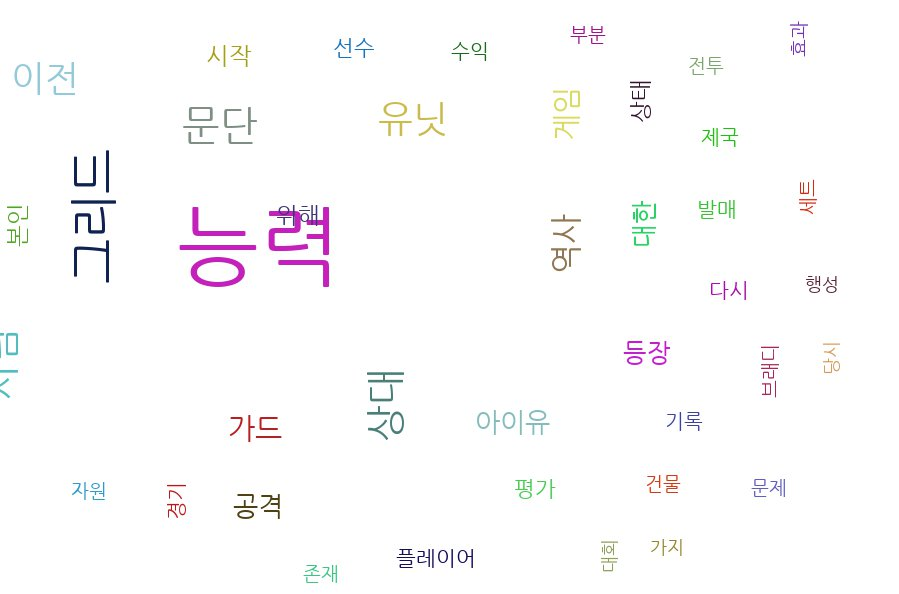

In [11]:
# pytagcloud 사용하기
import random
import pytagcloud
import webbrowser

# 가장 출현 빈도수가 높은 40개의 단어를 선정
ranked_tags=remove_char_counter.most_common(40)

# pytagcloud로 출력할 40개의 단어를 입력. 단어 출력의 최대 크기는 80으로 제한
taglist=pytagcloud.make_tags(ranked_tags,maxsize=80)

# pytagcloud 이미지를 생성, 폰트는 나눔 고딕 사용
pytagcloud.create_tag_image(taglist, 'wordcloud.jpg', size=(900,600), fontname='NanumGothic', rectangular=False)

# 생성한 이미지를 주피터 노트북상에서 출력
from IPython.display import Image
Image(filename='wordcloud.jpg')

# 미래를 예측하는 데이터 분석

## 비트코인 시세 예측하기

* 시계열 데이터: 규칙적 시계열 데이터분석(심장박동) VS 불규칙적 시계열 데이터분석(비트코인 시세)

### 탐색: 시간 정보가 포함된 데이터 살펴보기

In [1]:
# market price 데이터셋의 기본 정보 구하기

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path='./data/market-price.csv'
bitcoin_df=pd.read_csv(file_path,names=['day','price'])

print(bitcoin_df.shape)
print(bitcoin_df.info())
bitcoin_df.tail()  

(365, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     365 non-null    object 
 1   price   365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB
None


,day,price
360,2018-08-22 00:00:00,6575.229167
361,2018-08-23 00:00:00,6434.881667
362,2018-08-24 00:00:00,6543.645714
363,2018-08-25 00:00:00,6719.429231
364,2018-08-26 00:00:00,6673.274167


In [3]:
# to_datetime으로 day 피처를 시계열 피처로 변환
bitcoin_df['day'] = pd.to_datetime(bitcoin_df['day'])  # dataframe -> date-time
bitcoin_df

,day,price
0,2017-08-27,4354.308333
1,2017-08-28,4391.673517
2,2017-08-29,4607.985450
3,2017-08-30,4594.987850
4,2017-08-31,4748.255000
...,...,...
360,2018-08-22,6575.229167
361,2018-08-23,6434.881667
362,2018-08-24,6543.645714
363,2018-08-25,6719.429231


In [4]:
# day 데이터 프레임의 index로 설정
bitcoin_df.index = bitcoin_df['day']
bitcoin_df.set_index('day', inplace=True)  # 특정 열을 인덱스로 설정(인덱스: 각 데이터의 의미 표시, 데이터 처리 & 시각화 용의)
bitcoin_df

,price
day,
2017-08-27,4354.308333
2017-08-28,4391.673517
2017-08-29,4607.985450
2017-08-30,4594.987850
2017-08-31,4748.255000
...,...
2018-08-22,6575.229167
2018-08-23,6434.881667
2018-08-24,6543.645714


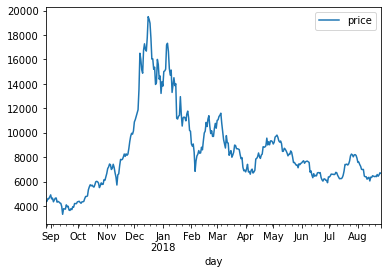

In [5]:
# 일자별 비트코인 시세 시각화
bitcoin_df.plot()
plt.show()

### 예측: 파이썬 라이브러리를 활용해 시세 예측

* ARIMA 분석방법
* AR모델로 자기 자신의 과거를 정보로 사용하는 개념 + MA모델로 이전 항에서의 오차를 이용하여 현재 항의 상태를 추론 + 추세변동의 경향성
* Auto regression
* Moving Average

In [6]:
#ARIMA모델 활용하기: 모델 학습

from statsmodels.tsa.arima_model import ARIMA   # statsmodel 모듈로 ARIMA 분석수행
import statsmodels.api as sm

# (AR=2, 차분=1, MA=2) 파라미터로 ARIMA 모델을 학습

# AR=2 AR이 몇 번째 과거까지 바라보는지에 대한 파라미터
# 차분(Difference)에 대한 파라미터, (현재상태의 변수 - 바로 전 상태의 변수) -> 시계열 데이터의 불규칙성 보정, ARIMA의 경향성 의미(update)
# MA=2 MR가 몇 번째 과거까지를 바라보는지에 대한 파라미터

model = ARIMA(bitcoin_df.price.values, order=(2,1,2))
model_fit = model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  364
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2787.553
Method:                       css-mle   S.D. of innovations            512.415
Date:                Sun, 21 Feb 2021   AIC                           5587.107
Time:                        20:26:33   BIC                           5610.490
Sample:                             1   HQIC                          5596.400
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3338     27.794      0.228      0.820     -48.141      60.808
ar.L1.D.y     -0.3785      1.822     -0.208      0.835      -3.950       3.193
ar.L2.D.y      0.1587      1.188      0.134      0.8

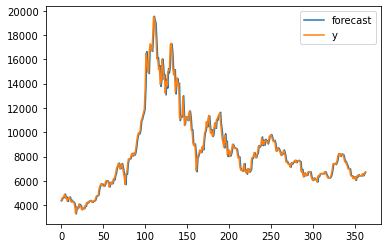

In [5]:
# ARIMA 모델 활용하기: 모델의 성능 & 예측 결과 시각화

fig = model_fit.plot_predict() # 학습 데이터에 대한 예측 결과 -> 너무 잘맞아서 의심...

<AxesSubplot:>

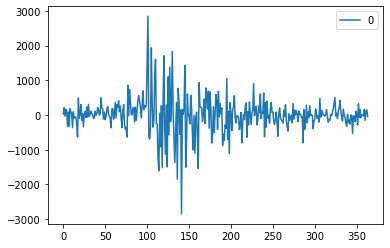

In [6]:
residuals = pd.DataFrame(model_fit.resid) # 잔차의 변동 시각화 -> 오차변동이 매우 불안정
residuals.plot()

* ARIMA 모델 평가: 테스트 데이터 활용 -> 5일 동안의 미래를 테스트 데이터로 사용(데이터가 불규칙하기 때문)
* 모델 평가 과정
* 1. model_fit.forecast(steps=5)로 향후 5일의 가격을 예측하여 pred_y로 정의(예측된 데이터)
* 2. './data/market-price-test.csv'에서 실제 향후 5일의 가격을 test_y로 정의(실제 데이터)
* 3. 모델이 예측한 상한값, 하한값을 pred_y_upper, pred_y_lower로 정의
* 4. 정의한 모든 값을 비교하여 5일 동안의 상승 경향 예측이 얼마나 맞았는지 평가(정확도 평가)

In [7]:
# ARIMA 모델 활용하기: 실제 데이터와의 비교

forecast_data = model_fit.forecast(steps=5) # predicted with train set

# 테스트 데이터셋 불러오기
test_file_path = './data/market-price-test.csv'
bitcoin_test_df = pd.read_csv(test_file_path, names=['ds','y'])

pred_y = forecast_data[0].tolist() # predicted with test set
test_y = bitcoin_test_df.y.values # observed test set

pred_y_lower = []
pred_y_upper = []

for lower_upper in forecast_data[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)


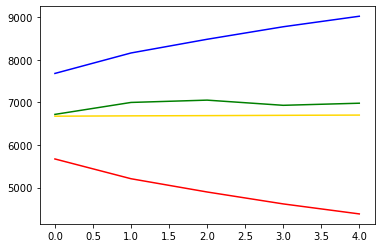

In [8]:
plt.plot(pred_y, color="gold")
plt.plot(pred_y_lower, color="red")
plt.plot(pred_y_upper, color="blue")
plt.plot(test_y, color="green")

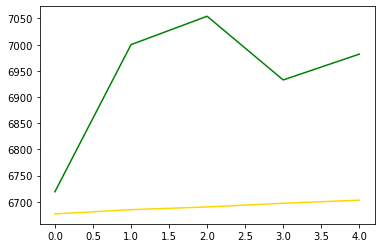

In [9]:
# 상한가, 하한가 제외

plt.plot(pred_y, color="gold")
plt.plot(test_y, color="green")

* Facebook Prophet 라이브러리
* ARIMA보다 조금 더 정확한 트렌드 예측 분석 제공
* Additive 모델: 시계열 데이터의 트렌드성(연간/월간/일간)을 예측하는 것에 초점

In [1]:
# Facebook Prophet 활용하기

from fbprophet import Prophet

# prophet을 사용하기 위해서 피처명 변경
bitcoin_df = pd.read_csv(file_path, names=['df','y'])

prophet = Prophet(seasonality_mode='multiplicative',
                 yearly_seasonality=True,
                 weekly_seasonality=True, daily_seasonality=True,
                 changepoint_prior_scale=0.5)
prophet.fit(bitcoin_df)

ModuleNotFoundError: No module named 'fbprophet'

In [2]:
from fbprophet import Prophet

ModuleNotFoundError: No module named 'fbprophet'

# 데이터분석 종합 예제